In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
dfa=pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

In [15]:
dfa.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
req_cols=['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']

In [17]:
dff=dfa[req_cols]

In [18]:
dff.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [19]:
dff.columns=dff.columns.str.lower().str.replace(" ","_")

In [20]:
dff

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [21]:
dff.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [24]:
dff=dff.fillna(0)

In [25]:
dff.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [26]:
dff['above_average']=dff['msrp'].apply(lambda x:1 if x> np.mean(dff['msrp']) else 0)

In [31]:
np.mean(dff['msrp'])

40594.737032063116

In [27]:
dff

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
new_cols=["make","model","year","engine_hp","engine_cylinders","transmission_type","vehicle_style","highway_mpg","city_mpg","above_average"]

In [34]:
dfn=dff[new_cols]

In [36]:
dfn.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [37]:
dfn.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [46]:
categ=list(dfn.dtypes[dfn.dtypes=='object'].index)

In [47]:
num=list(dfn.dtypes[dfn.dtypes!='object'].index)

In [48]:
categ

['make', 'model', 'transmission_type', 'vehicle_style']

In [50]:
num

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'above_average']

In [51]:
dfn.shape

(11914, 10)

In [52]:
dfn_full_train,dfn_test=train_test_split(dfn,test_size=0.2,random_state=1)

In [53]:
len(dfn_full_train),len(dfn_test)

(9531, 2383)

In [54]:
dfn_train,dfn_val=train_test_split(dfn_full_train,test_size=0.25,random_state=1)

In [57]:
len(dfn_train),len(dfn_val),len(dfn_test)

(7148, 2383, 2383)

In [61]:
dfn_train=dfn_train.reset_index(drop=True)
dfn_val=dfn_val.reset_index(drop=True)
dfn_test=dfn_test.reset_index(drop=True)

In [65]:
y_train=dfn_train.above_average.values
y_val=dfn_val.above_average.values
y_test=dfn_test.above_average.values

In [71]:
len(dfn_train)

7148

In [78]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
from sklearn.metrics import auc

In [74]:
dfn_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17
...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16


In [95]:
num_1=['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [96]:
from sklearn.metrics import roc_curve

### One Hot Encoding

In [93]:
from sklearn.feature_extraction import DictVectorizer

In [103]:
dv=DictVectorizer(sparse=False)
train_dictt=dfn_train[categ+num_1].to_dict(orient='records')
x_trainn=dv.fit_transform(train_dictt)

val_dictt=dfn_val[categ+num_1].to_dict(orient='records')
x_val=dv.transform(val_dictt)

### Logistic Regression ML model

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
modelc=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [108]:
modelc.fit(x_trainn,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [115]:
y_predd=modelc.predict_proba(x_val)[:,1]

### Roc AUC 

In [116]:
fpr,tpr,thresholds=roc_curve(y_val,y_predd)

In [120]:
round(auc(fpr,tpr),4)

0.9802

In [121]:
#0.98

### Precision and Recall

In [126]:
thresholdss=np.arange(0.0,1.0,0.01)

In [127]:
thresholdss

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [148]:
new_scores=[]

thresholdss=np.arange(0.0,1.0,0.01)

for t in thresholdss:
    actual_positive=(y_val==1)
    actual_negative=(y_val==0)
    
    predict_positive=(y_predd >= t)
    predict_negative=(y_predd < t)
    
    tp=(predict_positive & actual_positive).sum()
    tn=(predict_negative & actual_negative).sum()
    
    fp=(predict_positive & actual_negative).sum()
    fn=(predict_negative & actual_positive).sum()
    
    pre=tp/tp+fp
    rec=tp/tp+fn
    
    F1=2*((pre*rec)/(pre+rec))
    
    new_scores.append((t,pre,rec,F1))

In [165]:
colns=['threshold','precision','recall','F1_Score']
df_pre_rec=pd.DataFrame(new_scores,columns=colns)

In [167]:
print(df_pre_rec.describe())

        threshold    precision      recall    F1_Score
count  100.000000   100.000000  100.000000  100.000000
mean     0.495000   140.020000  116.380000   43.945136
std      0.290115   219.689817  108.238119   25.990216
min      0.000000     1.000000    1.000000    1.995261
25%      0.247500    24.500000   40.250000   17.509597
50%      0.495000    71.500000   76.500000   47.466350
75%      0.742500   181.750000  165.000000   69.816042
max      0.990000  1730.000000  463.000000   74.684211


In [195]:
df_pre_rec.iloc[32,:]

threshold      0.320000
precision    133.000000
recall        51.000000
F1_Score      73.728261
Name: 32, dtype: float64

In [187]:
df_pre_rec['F1_Score'].max()

74.6842105263158

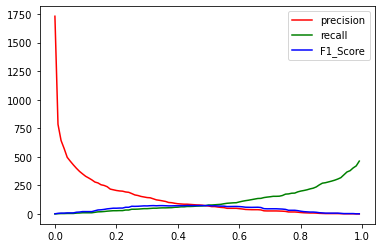

In [151]:
plt.plot(df_pre_rec['threshold'],df_pre_rec['precision'],label='precision',color='red')
plt.plot(df_pre_rec['threshold'],df_pre_rec['recall'],label='recall',color='green')
plt.plot(df_pre_rec['threshold'],df_pre_rec['F1_Score'],label='F1_Score',color='blue')

plt.legend()

In [144]:
#0.48

In [196]:
#0.32 - F1_score max

In [207]:
def train(dfn_train, y_train, C=1.0):
    dicts = dfn_train[categ+num_1].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_trainn = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_trainn, y_train)
    
    return dv, model

In [212]:
def predict(df, dv, model):
    dicts = df[categ+num_1].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [213]:
from sklearn.metrics import roc_auc_score

In [214]:
from sklearn.model_selection import KFold

In [217]:
folds=[5,10,15,20,25]

for fold in folds:
    kfold = KFold(n_splits=fold, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(dfn_full_train):
        dfn_train = dfn_full_train.iloc[train_idx]
        dfn_val = dfn_full_train.iloc[val_idx]

        y_train = dfn_train.above_average.values
        y_val = dfn_val.above_average.values

        dv, model = train(dfn_train, y_train, C=1.0)
        y_pred = predict(dfn_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('fold=%s %.3f +- %.3f' % (fold, np.mean(scores), np.std(scores)))

fold=5 0.979 +- 0.002
fold=10 0.979 +- 0.006
fold=15 0.979 +- 0.006
fold=20 0.979 +- 0.007
fold=25 0.981 +- 0.006


In [218]:
# 0.003

In [220]:
from tqdm.auto import tqdm

In [222]:
n_splits = 5

cvals=[0.01, 0.1, 0.5, 10]

for f in tqdm(cvals):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(dfn_full_train):
        dfn_train = dfn_full_train.iloc[train_idx]
        dfn_val = dfn_full_train.iloc[val_idx]

        y_train = dfn_train.above_average.values
        y_val = dfn_val.above_average.values

        dv, model = train(dfn_train, y_train, C=f)
        y_pred = predict(dfn_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('f=%s %.3f +- %.3f' % (f, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

f=0.01 0.952 +- 0.002
f=0.1 0.972 +- 0.002
f=0.5 0.978 +- 0.003
f=10 0.984 +- 0.003


In [225]:
scores

[0.983008827654484,
 0.9806084245942738,
 0.9861664157046455,
 0.979956499916346,
 0.9879412254412254]

In [226]:
#0.01

In [227]:
#city_mpg